In [1]:
data = {}

path_to_data = r'all_time-series/ts_cut'

import os
import numpy as np
import re

parser_regex = r'(ihb|china|rmet)_(open|close)_strategy-(\d)_(GSR|noGSR).npy'
extractor = re.compile(parser_regex)

items = {atlas_name : {dataset_name : []
                       for dataset_name in ['china', 'ihb', 'rmet']}
         for atlas_name in ['HCPex', 'Brainnetome', 'AAL', 'Schaefer200']}

for root, dirs, files in os.walk(path_to_data):
    for file in files:
        atlas = root.split(os.sep)[1]
        source = root.split(os.sep)[2]
        items[atlas][source].append(np.load(os.path.join(root, file)))

items

{'HCPex': {'china': [array([[[-1.17076013, -1.23330809, -1.37375326, ...,  4.38815268,
            -0.30531769,  0.70241914],
           [-1.00757502, -1.51511905, -1.63247539, ...,  8.05484726,
            -0.47242387,  0.16418169],
           [-0.12086729, -0.7246971 , -0.53591199, ..., -1.46934224,
             3.85081189, -0.92280639],
           ...,
           [ 0.65221812,  0.34752065,  0.03970072, ...,  5.45133722,
             3.88648941,  1.42971987],
           [ 0.62628035,  0.41311849, -0.11514005, ..., -1.72239038,
            -0.23984629, -0.79155209],
           [ 1.00789606,  1.27529809,  1.01474327, ...,  1.07004449,
             1.20785802, -0.06740455]],
   
          [[ 0.16393245, -0.58638667, -0.30259429, ..., -1.21343657,
             1.50710589,  0.81989219],
           [ 1.1814558 ,  1.47208418,  1.00595295, ..., -7.88525242,
             1.24479995,  0.47604834],
           [ 0.45372181,  0.25347434,  0.20319378, ...,  0.36312762,
             1.10056175,  0.

In [2]:
items['AAL']['rmet'][0][0].shape

(120, 116)

In [3]:
len(items['AAL']['rmet'][0])

63

In [4]:
import pandas as pd
import numpy as np
from itertools import combinations, product

data_dif = np.empty((539028, 121)) #539028
data_same = np.empty((36288, 121))
atlas = 'AAL'
database = 'rmet'
i = 0

for person1, person2 in combinations(range(len(items[atlas][database][0])), r=2):
    for teg1, teg2 in combinations(range(len(items[atlas][database])), r=2):
        a = items[atlas][database][teg1][person1][:, 0]
        b = items[atlas][database][teg2][person2][:, 0]
        data_dif[i] = np.hstack([a - b, np.array([0])])
        i += 1

i = 0
for person in range(len(items[atlas][database][0])):
    for teg1, teg2 in product(range(len(items[atlas][database])), repeat=2):
        a = items[atlas][database][teg1][person][:, 0]
        b = items[atlas][database][teg2][person][:, 0]
        data_same[i] = np.hstack([a - b, np.array([1])])

        i += 1


short_data_dif = data_dif[:36288:14, :]

In [5]:
data = np.vstack([data_dif, data_same])

short_data = np.vstack([short_data_dif, data_same])

In [6]:
df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)

short_df = pd.DataFrame(short_data)
short_df = short_df.sample(frac=1).reset_index(drop=True)

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,0.304612,0.185146,-0.235010,0.909024,-0.442723,0.766423,0.322296,0.226610,0.236648,-0.803550,...,-1.434376,0.711042,-0.405502,0.251783,0.211405,0.790396,0.248718,-0.759167,0.370973,0.0
1,0.168056,0.338835,-0.015776,0.822504,-0.091151,-0.489321,-0.487493,-0.454238,0.421107,-0.282977,...,-0.334872,-0.799670,-0.393250,0.164140,0.590849,-1.516725,0.511293,-0.824120,-0.120075,0.0
2,-0.973968,0.410759,1.492357,-0.285938,-0.101369,0.331595,0.058924,-1.205820,-0.559651,0.101796,...,-0.704619,-0.155662,0.485239,0.954754,0.043321,0.250207,0.146883,-1.070225,0.322568,0.0
3,0.957268,-0.741637,0.883878,-0.095804,0.367333,-0.573575,-0.511142,-0.117628,-0.131904,-0.744979,...,0.093715,0.801901,0.736955,-0.061978,1.040498,-0.314245,-0.456094,-1.037947,-0.176395,0.0
4,0.693575,-0.363827,0.775343,-1.981835,0.405484,-0.603782,0.700145,-0.647144,-0.894469,1.093429,...,-0.099091,-0.219647,-1.113802,1.223146,-1.383539,0.451614,-1.014073,0.435376,0.138331,0.0


In [ ]:
!pip install catboost

In [7]:
from sklearn.model_selection import train_test_split

y = df[120]
X = df.drop(120, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_short = short_df[120]
X_short = short_df.drop(120, axis=1)
X_train_short, X_test_short, y_train_short, y_test_short = train_test_split(X, y, test_size=0.2, random_state=42)

long train + long test

In [8]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=10)
# Fit model
model.fit(X_train_short, y_train_short)

0:	learn: 0.5572967	total: 507ms	remaining: 50.2s
1:	learn: 0.4481150	total: 888ms	remaining: 43.5s
2:	learn: 0.3711136	total: 1.16s	remaining: 37.6s
3:	learn: 0.3118257	total: 1.49s	remaining: 35.8s
4:	learn: 0.2691680	total: 1.77s	remaining: 33.6s
5:	learn: 0.2357071	total: 2.09s	remaining: 32.7s
6:	learn: 0.2116447	total: 2.4s	remaining: 31.8s
7:	learn: 0.1934507	total: 2.69s	remaining: 30.9s
8:	learn: 0.1782505	total: 3s	remaining: 30.4s
9:	learn: 0.1654800	total: 3.36s	remaining: 30.2s
10:	learn: 0.1553242	total: 3.71s	remaining: 30.1s
11:	learn: 0.1472178	total: 4.04s	remaining: 29.7s
12:	learn: 0.1401744	total: 4.37s	remaining: 29.2s
13:	learn: 0.1338512	total: 4.7s	remaining: 28.9s
14:	learn: 0.1295182	total: 4.99s	remaining: 28.3s
15:	learn: 0.1242813	total: 5.33s	remaining: 28s
16:	learn: 0.1201669	total: 5.65s	remaining: 27.6s
17:	learn: 0.1174843	total: 5.92s	remaining: 27s
18:	learn: 0.1141628	total: 6.22s	remaining: 26.5s
19:	learn: 0.1117829	total: 6.48s	remaining: 25.9s

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score

pred = model.predict(X_test)
accuracy_score(y_test, pred), f1_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred)

(0.9892233887227977,
 0.9080936851467536,
 0.9988586336213925,
 0.8324500611496127)

short train + long test

In [20]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=10)
# Fit model
model.fit(X_train_short, y_train_short)

0:	learn: 0.5535689	total: 312ms	remaining: 30.9s
1:	learn: 0.4446964	total: 645ms	remaining: 31.6s
2:	learn: 0.3689905	total: 901ms	remaining: 29.1s
3:	learn: 0.3114967	total: 1.21s	remaining: 29s
4:	learn: 0.2723883	total: 1.47s	remaining: 27.8s
5:	learn: 0.2377961	total: 1.76s	remaining: 27.7s
6:	learn: 0.2142000	total: 2.06s	remaining: 27.4s
7:	learn: 0.1947502	total: 2.34s	remaining: 27s
8:	learn: 0.1787051	total: 2.64s	remaining: 26.7s
9:	learn: 0.1662104	total: 2.95s	remaining: 26.6s
10:	learn: 0.1558780	total: 3.23s	remaining: 26.1s
11:	learn: 0.1474221	total: 3.5s	remaining: 25.7s
12:	learn: 0.1397772	total: 3.78s	remaining: 25.3s
13:	learn: 0.1334803	total: 4.06s	remaining: 24.9s
14:	learn: 0.1279983	total: 4.33s	remaining: 24.6s
15:	learn: 0.1248944	total: 4.55s	remaining: 23.9s
16:	learn: 0.1208320	total: 4.84s	remaining: 23.6s
17:	learn: 0.1182040	total: 5.06s	remaining: 23.1s
18:	learn: 0.1148928	total: 5.35s	remaining: 22.8s
19:	learn: 0.1125851	total: 5.62s	remaining: 2

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score

pred = model.predict(X_test)
accuracy_score(y_test, pred), f1_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred)

(0.9895970937912814,
 0.9105314298527544,
 0.9995077125041024,
 0.8361015785861359)

long train + short test

In [22]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=10)
# Fit model
model.fit(X_train, y_train)

0:	learn: 0.5535689	total: 305ms	remaining: 30.2s
1:	learn: 0.4446964	total: 655ms	remaining: 32.1s
2:	learn: 0.3689905	total: 915ms	remaining: 29.6s
3:	learn: 0.3114967	total: 1.2s	remaining: 28.8s
4:	learn: 0.2723883	total: 1.44s	remaining: 27.4s
5:	learn: 0.2377961	total: 1.73s	remaining: 27.1s
6:	learn: 0.2142000	total: 2.01s	remaining: 26.8s
7:	learn: 0.1947502	total: 2.28s	remaining: 26.2s
8:	learn: 0.1787051	total: 2.57s	remaining: 26s
9:	learn: 0.1662104	total: 2.87s	remaining: 25.9s
10:	learn: 0.1558780	total: 3.14s	remaining: 25.4s
11:	learn: 0.1474221	total: 3.42s	remaining: 25.1s
12:	learn: 0.1397772	total: 3.71s	remaining: 24.8s
13:	learn: 0.1334803	total: 4.04s	remaining: 24.8s
14:	learn: 0.1279983	total: 4.32s	remaining: 24.5s
15:	learn: 0.1248944	total: 4.56s	remaining: 24s
16:	learn: 0.1208320	total: 4.89s	remaining: 23.9s
17:	learn: 0.1182040	total: 5.15s	remaining: 23.4s
18:	learn: 0.1148928	total: 5.43s	remaining: 23.2s
19:	learn: 0.1125851	total: 5.68s	remaining: 2

In [23]:
pred = model.predict(X_test_short)
accuracy_score(y_test_short, pred), f1_score(y_test_short, pred), precision_score(y_test_short, pred), recall_score(y_test_short, pred)

(0.9895970937912814,
 0.9105314298527544,
 0.9995077125041024,
 0.8361015785861359)

short train + short test

In [24]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=10)
# Fit model
model.fit(X_train_short, y_train_short)

0:	learn: 0.5535689	total: 313ms	remaining: 31s
1:	learn: 0.4446964	total: 647ms	remaining: 31.7s
2:	learn: 0.3689905	total: 897ms	remaining: 29s
3:	learn: 0.3114967	total: 1.2s	remaining: 28.7s
4:	learn: 0.2723883	total: 1.45s	remaining: 27.5s
5:	learn: 0.2377961	total: 1.74s	remaining: 27.2s
6:	learn: 0.2142000	total: 2.02s	remaining: 26.8s
7:	learn: 0.1947502	total: 2.28s	remaining: 26.3s
8:	learn: 0.1787051	total: 2.58s	remaining: 26.1s
9:	learn: 0.1662104	total: 2.88s	remaining: 25.9s
10:	learn: 0.1558780	total: 3.15s	remaining: 25.4s
11:	learn: 0.1474221	total: 3.46s	remaining: 25.3s
12:	learn: 0.1397772	total: 3.77s	remaining: 25.2s
13:	learn: 0.1334803	total: 4.04s	remaining: 24.8s
14:	learn: 0.1279983	total: 4.31s	remaining: 24.4s
15:	learn: 0.1248944	total: 4.52s	remaining: 23.7s
16:	learn: 0.1208320	total: 4.79s	remaining: 23.4s
17:	learn: 0.1182040	total: 5.01s	remaining: 22.8s
18:	learn: 0.1148928	total: 5.25s	remaining: 22.4s
19:	learn: 0.1125851	total: 5.48s	remaining: 2

In [25]:
pred = model.predict(X_test_short)
accuracy_score(y_test_short, pred), f1_score(y_test_short, pred), precision_score(y_test_short, pred), recall_score(y_test_short, pred)

(0.9895970937912814,
 0.9105314298527544,
 0.9995077125041024,
 0.8361015785861359)

In [ ]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
# Fit model
model.fit(X_train, y_train)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="[ 0.03832905 -0.68564965 -0.65021743 ...  3.41655477 -0.7135459
 -0.160539  ]": Cannot convert obj [ 0.03832905 -0.68564965 -0.65021743 ...  3.41655477 -0.7135459
 -0.160539  ] to float

In [ ]:
model.predict(X_test)

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [ ]:
model.predict_proba(X_test)

In [ ]:
model.predict(X_test, prediction_type='RawFormulaVal')

In [ ]:
import pandas as pd

df = pd.DataFrame(list([val] for val in data.values()), index=pd.MultiIndex.from_tuples(data.keys(), names=['atlas', 'dataset', 'class', 'strategy', 'GSR']))
df.sort_index(inplace=True);

In [ ]:
df.head()

0
atlas dataset class strategy GSR                                                     
AAL   rmet    close 2        GSR    [[[0.49872941386279845, -0.8318829721130215, 1...
                             noGSR  [[[0.678245159604991, -0.25980114630165074, 0....
                    3        GSR    [[[0.8165110807596462, -0.5689161667585938, 1....
                             noGSR  [[[0.9840598021404207, -0.07008979256868253, 0...
              open  2        GSR    [[[0.02001187235572125, -0.07345551936605457, ...

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df.iloc[0].item()

array([[[ 4.98729414e-01, -8.31882972e-01,  1.08565267e+00, ...,
         -1.25194687e+00,  8.62937301e-01, -1.42285915e+00],
        [-8.73694358e-01, -7.73899958e-02, -2.13107072e-01, ...,
          6.71831789e-01,  3.79522605e-01,  5.21428611e+00],
        [ 7.03247485e-01,  3.44189012e-01,  2.00920395e-01, ...,
         -8.43784024e-01, -1.17797884e+00, -6.96275327e-01],
        ...,
        [-9.49996535e-01,  6.39507108e-02, -3.73141534e-01, ...,
          9.44741947e-01,  7.89769971e-01, -8.64939319e-02],
        [ 7.92320069e-01, -3.83750067e-01,  7.60673248e-01, ...,
         -1.25950660e+00, -1.83463172e+00, -3.79737211e-02],
        [-1.33242480e-01, -4.73495447e-01,  1.00473557e+00, ...,
         -2.04185118e-01, -5.51008796e-02,  1.26752761e+00]],

       [[ 3.79468368e-01,  1.17829383e-01,  4.18010734e-01, ...,
          4.49394836e-01, -5.78737258e-02, -5.93763917e+00],
        [-1.95470896e-01,  3.01472399e-01,  2.40322049e-01, ...,
          1.34769213e+00,  1.84679381e

In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 48.2 MB/s eta 0:00:00


In [ ]:
df.iloc[2]

,AAL
,rmet
,close
,3
,GSR
0,"[[[0.8165110807596462, -0.5689161667585938, 1...."


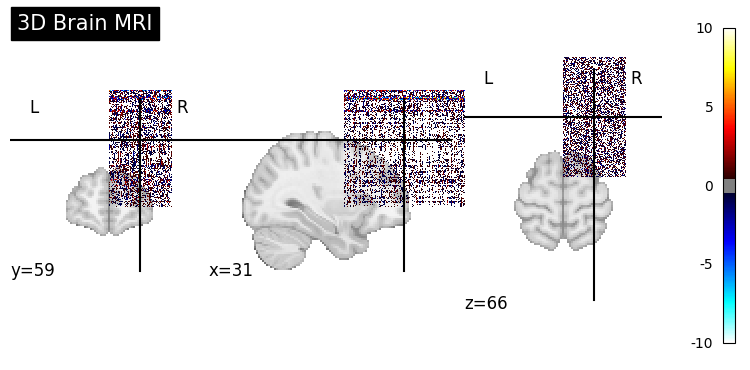

In [ ]:
from nilearn import plotting
from nibabel import Nifti1Image
from nilearn import image

# Предположим, что у тебя есть ndarray с именем 'data' с формой (63, 120, 116)
data = df.iloc[2].item()

# Создаем объект Nifti1Image, который можно передать в nilearn
img = Nifti1Image(data, affine=np.eye(4))
smoothed_img = image.smooth_img(img, fwhm=6)
# Используем nilearn для визуализации
plotting.plot_stat_map(img, title="3D Brain MRI", threshold=0.5,resampling_interpolation='continuous')
plotting.show()


[_add_readme_to_default_data_locations] Added README.md to /root/nilearn_data

[get_dataset_dir] Dataset created in /root/nilearn_data/spm_auditory

[fetch_spm_auditory] Data absent, downloading...

[fetch_single_file] Downloading data from 
https://www.fil.ion.ucl.ac.uk/spm/download/data/MoAEpilot/MoAEpilot.bids.zip ...

[_chunk_report_] Downloaded 2727936 of 30176409 bytes (9.0%%,   10.2s remaining)

[_chunk_report_] Downloaded 7561216 of 30176409 bytes (25.1%%,    6.1s remaining)

[_chunk_report_] Downloaded 12451840 of 30176409 bytes (41.3%%,    4.3s remaining)

[_chunk_report_] Downloaded 16375808 of 30176409 bytes (54.3%%,    3.4s remaining)

[_chunk_report_] Downloaded 20480000 of 30176409 bytes (67.9%%,    2.4s remaining)

[_chunk_report_] Downloaded 24551424 of 30176409 bytes (81.4%%,    1.4s remaining)

[_chunk_report_] Downloaded 28712960 of 30176409 bytes (95.2%%,    0.4s remaining)

[fetch_single_file]  ...done. (8 seconds, 0 min)

[uncompress_file] Extracting data from /root/nilearn_data/spm_auditory/MoAEpilot.bids.zip...

[uncompress_file] .. done.

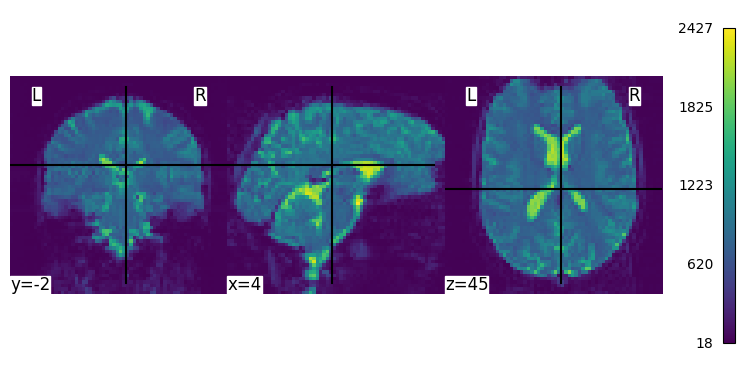

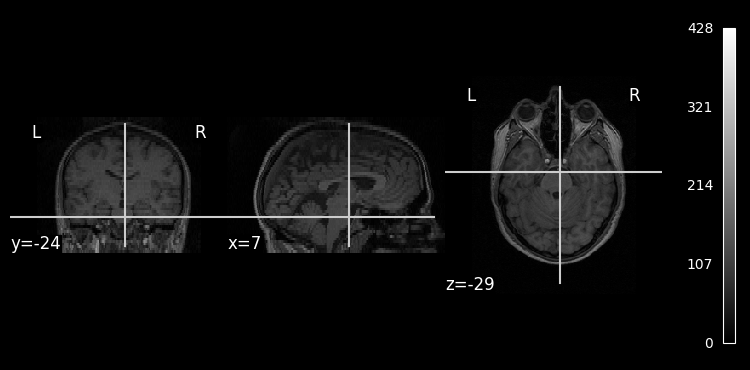

In [ ]:
from nilearn.datasets import fetch_spm_auditory

subject_data = fetch_spm_auditory()

from nilearn.image import mean_img
from nilearn.plotting import plot_anat, plot_img, plot_stat_map, show

fmri_img = subject_data.func
mean_img = mean_img(subject_data.func[0], copy_header=True)
plot_img(mean_img, colorbar=True, cbar_tick_format="%i")

plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

show()

0
atlas dataset class strategy GSR                                                     
AAL   rmet    close 2        GSR    [[[0.49872941386279845, -0.8318829721130215, 1...
                             noGSR  [[[0.678245159604991, -0.25980114630165074, 0....
                    3        GSR    [[[0.8165110807596462, -0.5689161667585938, 1....
                             noGSR  [[[0.9840598021404207, -0.07008979256868253, 0...
              open  2        GSR    [[[0.02001187235572125, -0.07345551936605457, ...